# Time Series Forecasting with Python (ARIMA, LSTM, Prophet)

In [1]:
#!pip install pmdarima

In [2]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
from pmdarima import auto_arima                        
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
import warnings
warnings.filterwarnings("ignore")

In this article we will try to forecast a time series data basically. We'll build three different model with Python and inspect their results. Models we will use are ARIMA (Autoregressive Integrated Moving Average), LSTM (Long Short Term Memory Neural Network) and Facebook Prophet. Let's jump in and start with ARIMA.

## ARIMA (Autoregressive Integrated Moving Average)

ARIMA is a model which is used for predicting future trends on a time series data. It is model that form of regression analysis. 
* **AR (Autoregression) :** Model that shows a changing variable that regresses on its own lagged/prior values.
* **I (Integrated) :**  Differencing of raw observations to allow for the time series to become stationary
* **MA (Moving average) :** Dependency between an observation and a residual error from a moving average model

For ARIMA models, a standard notation would be ARIMA with p, d, and q, where integer values substitute for the parameters to indicate the type of ARIMA model used.

* **p:** the number of lag observations in the model; also known as the lag order.
* **d:** the number of times that the raw observations are differenced; also known as the degree of differencing.
* **q:** the size of the moving average window; also known as the order of the moving average.

For more information about ARIMA you can check:
<br>
[What is ARIMA](https://www.quora.com/What-is-ARIMA)
<br>
[Autoregressive Integrated Moving Average (ARIMA)](https://www.investopedia.com/terms/a/autoregressive-integrated-moving-average-arima.asp)

## LSTM Neural Network

> LSTM stands for long short term memory. It is a model or architecture that extends the memory of recurrent neural networks. Typically, recurrent neural networks have ‘short term memory’ in that they use persistent previous information to be used in the current neural network. Essentially, the previous information is used in the present task. That means we do not have a list of all of the previous information available for the neural node.
> LSTM introduces long-term memory into recurrent neural networks. It mitigates the vanishing gradient problem, which is where the neural network stops learning because the updates to the various weights within a given neural network become smaller and smaller. It does this by using a series of ‘gates’. These are contained in memory blocks which are connected through layers, like this:

![](https://hub.packtpub.com/wp-content/uploads/2018/04/LSTM-696x494.png)

> LSTM work
There are three types of gates within a unit:
Input Gate: Scales input to cell (write)
Output Gate: Scales output to cell (read)
Forget Gate: Scales old cell value (reset)
Each gate is like a switch that controls the read/write, thus incorporating the long-term memory function into the model.

For more detail:
<br>
[What is LSTM?](https://hub.packtpub.com/what-is-lstm/)
<br>
[What is LSTM? - Quora](https://www.quora.com/What-is-LSTM)
<br>
[Wikipedia](https://en.wikipedia.org/wiki/Long_short-term_memory)

## Prophet

> Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

[Facebook's Prophet Web Page](https://facebook.github.io/prophet/)<br>
[Forecasting at Scale](https://peerj.com/preprints/3190.pdf)


# FORECAST

## Read Dataset

In [3]:
df = pd.read_csv('monthly-beer-production-in-austr.csv')

In [4]:
df.head()

,Month,Monthly beer production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    476 non-null    object 
 1   Monthly beer production  476 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.6+ KB


In [6]:
df.Month = pd.to_datetime(df.Month)

In [7]:
df = df.set_index("Month")
df.head()

,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


In [8]:
df.index.freq = 'MS'

[Text(0, 0.5, 'Total Production'), Text(0.5, 0, 'Dates')]

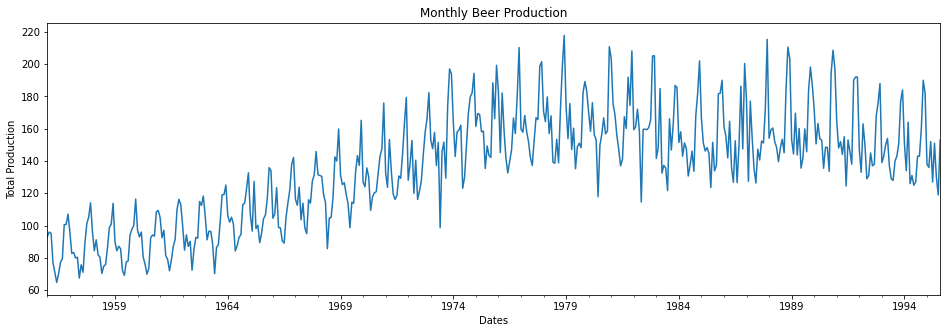

In [9]:
ax = df['Monthly beer production'].plot(figsize = (16,5), title = "Monthly Beer Production")
ax.set(xlabel='Dates', ylabel='Total Production')

When we look at plot we can sey there is a seasonality in data. That's why we will use SARIMA (Seasonal ARIMA) instead of ARIMA.

> Seasonal ARIMA, is an extension of ARIMA that explicitly supports univariate time series data with a seasonal component.
> It adds three new hyperparameters to specify the autoregression (AR), differencing (I) and moving average (MA) for the seasonal component of the series, as well as an additional parameter for the period of the seasonality.

> There are four seasonal elements that are not part of ARIMA that must be configured; they are:<br>
**P:** Seasonal autoregressive order.<br>
**D:** Seasonal difference order.<br>
**Q:** Seasonal moving average order.<br>
**m:** The number of time steps for a single seasonal period.<br>

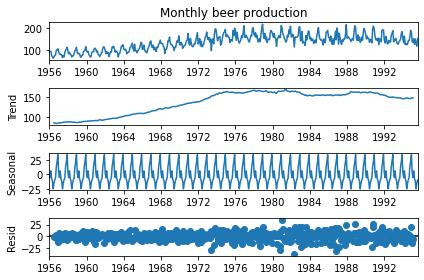

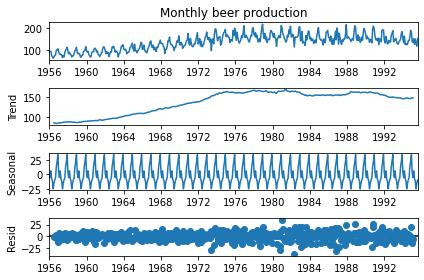

In [10]:
a = seasonal_decompose(df["Monthly beer production"], model = "add")
a.plot()

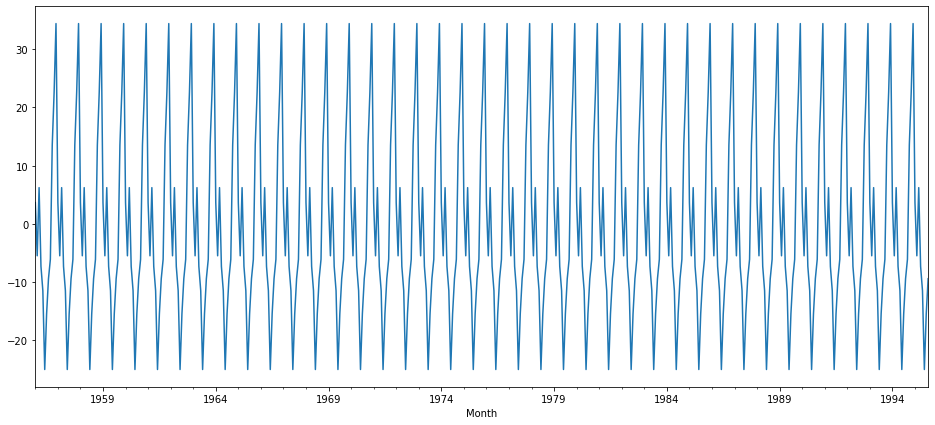

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,7))
a.seasonal.plot()

## ARIMA Forecast

Let's run auto_arima() function to get best p,d,q,P,D,Q values

In [12]:
auto_arima(df['Monthly beer production'], seasonal=True, m=12,max_p=7, max_d=5,max_q=7, max_P=4, max_D=4,max_Q=4).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  476
Model:             SARIMAX(5, 1, 4)x(1, 0, [1], 12)   Log Likelihood               -1723.778
Date:                              Wed, 09 Sep 2020   AIC                           3471.556
Time:                                      18:37:47   BIC                           3521.515
Sample:                                           0   HQIC                          3491.202
                                              - 476                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2405      0.057     -4.196      0.000      -0.353      -0.128
ar.L2         -0.1354      0.062     -2.193      0.028      -0.256      -0.014
ar.L3          0.7084      0.062     11.405      0.000       0.587       0.830
ar.L4         -0.1580      0.050     -3.190      0.001      -0.255      -0.061
ar.L5          0.0237      0.049      0.481      0.630      -0.073       0.120
ma.L1         -0.7325      0.038    -19.033      0.000      -0.808      -0.657
ma.L2         -0.1651      0.026     -6.381      0.000      -0.216      -0.114
ma.L3         -0.8007      0.025    -32.441      0.000      -0.849      -0.752
ma.L4          0.8440      0.034     24.959      0.000       0.778       0.910
ar.S.L12       0.9945      0.005    218.971      0.000       0.986       1.003
ma.S.L12      -0.8001      0.038    -21.151      0.000      -0.874      -0.726
sigma2        78.3142      4.200     18.647      0.000      70.083      86.546
===================================================================================
Ljung-Box (Q):                       42.04   Jarque-Bera (JB):                72.77
Prob(Q):                              0.38   Prob(JB):                         0.00
Heteroskedasticity (H):               3.00   Skew:                            -0.33
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

As we can see best arima model chosen by auto_arima() is SARIMAX(2, 1, 1)x(4, 0, 3, 12)

Let's split the data into train and test set

In [13]:
train_data = df[:len(df)-12]
test_data = df[len(df)-12:]

In [14]:
arima_model = SARIMAX(train_data['Monthly beer production'], order = (2,1,1), seasonal_order = (4,0,3,12))
arima_result = arima_model.fit()
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                         SARIMAX Results                                          
==================================================================================================
Dep. Variable:                    Monthly beer production   No. Observations:                  464
Model:             SARIMAX(2, 1, 1)x(4, 0, [1, 2, 3], 12)   Log Likelihood               -1708.062
Date:                                    Wed, 09 Sep 2020   AIC                           3438.124
Time:                                            18:38:39   BIC                           3483.639
Sample:                                        01-01-1956   HQIC                          3456.042
                                             - 08-01-1994                                         
Covariance Type:                                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1216      0.040     -3.067      0.002      -0.199      -0.044
ar.L2         -0.1683      0.046     -3.658      0.000      -0.259      -0.078
ma.L1         -0.8454      0.027    -30.840      0.000      -0.899      -0.792
ar.S.L12       1.7548      0.097     17.999      0.000       1.564       1.946
ar.S.L24      -1.6058      0.190     -8.464      0.000      -1.978      -1.234
ar.S.L36       0.7822      0.143      5.462      0.000       0.502       1.063
ar.S.L48       0.0675      0.044      1.520      0.129      -0.020       0.155
ma.S.L12      -1.5549      0.118    -13.161      0.000      -1.787      -1.323
ma.S.L24       1.3865      0.201      6.891      0.000       0.992       1.781
ma.S.L36      -0.6538      0.118     -5.550      0.000      -0.885      -0.423
sigma2        84.3149      4.981     16.928      0.000      74.553      94.077
===================================================================================
Ljung-Box (Q):                       92.55   Jarque-Bera (JB):                41.39
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               4.08   Skew:                            -0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
arima_pred = arima_result.predict(start = len(train_data), end = len(df)-1, typ="levels").rename("ARIMA Predictions")
arima_pred

1994-09-01    133.940921
1994-10-01    157.881452
1994-11-01    181.949510
1994-12-01    183.549671
1995-01-01    144.855921
1995-02-01    136.797400
1995-03-01    151.158303
1995-04-01    133.143691
1995-05-01    137.883746
1995-06-01    120.590432
1995-07-01    128.435352
1995-08-01    138.825135
Freq: MS, Name: ARIMA Predictions, dtype: float64

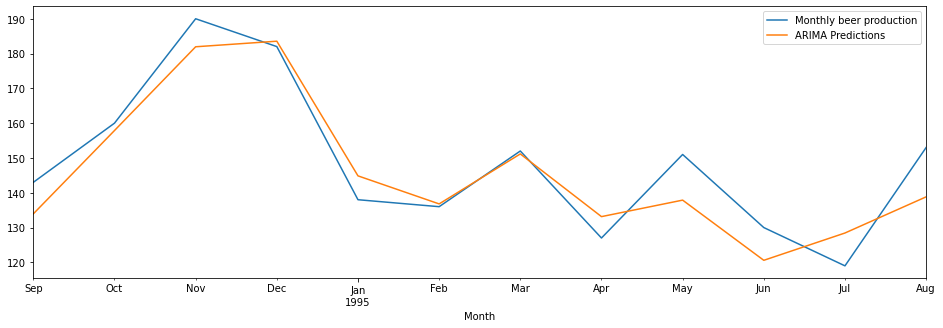

In [16]:
test_data['Monthly beer production'].plot(figsize = (16,5), legend=True)
arima_pred.plot(legend = True);

In [17]:
arima_rmse_error = rmse(test_data['Monthly beer production'], arima_pred)
arima_mse_error = arima_rmse_error**2
mean_value = df['Monthly beer production'].mean()

print(f'MSE Error: {arima_mse_error}\nRMSE Error: {arima_rmse_error}\nMean: {mean_value}')

MSE Error: 65.8657235261383
RMSE Error: 8.115770051334518
Mean: 136.39537815126045


In [18]:
test_data['ARIMA_Predictions'] = arima_pred

## LSTM Forecast

First we'll scale our train and test data with MinMaxScaler

In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [42]:
scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

Before creating LSTM model we should create a Time Series Generator object.

In [43]:
from keras.preprocessing.sequence import TimeseriesGenerator

n_input = 12
n_features= 1
generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length=n_input, batch_size=1)

Using TensorFlow backend.


In [46]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

lstm_model = Sequential()
lstm_model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

lstm_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 200)               161600    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 201       
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [47]:
lstm_model.fit_generator(generator,epochs=20)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
452/452 [==============================] - 9s 21ms/step - loss: 0.0261
Epoch 2/20
452/452 [==============================] - 8s 19ms/step - loss: 0.0140
Epoch 3/20
452/452 [==============================] - 10s 21ms/step - loss: 0.0103
Epoch 4/20
452/452 [==============================] - 11s 24ms/step - loss: 0.0099
Epoch 5/20
452/452 [==============================] - 8s 19ms/step - loss: 0.0080
Epoch 6/20
452/452 [==============================] - 8s 19ms/step - loss: 0.0081
Epoch 7/20
452/452 [==============================] - 9s 20ms/step - loss: 0.0081
Epoch 8/20
452/452 [==============================] - 9s 19ms/step - loss: 0.0075
Epoch 9/20
452/452 [==============================] - 9s 19ms/step - loss: 0.0069
Epoch 10/20
452/452 [==============================] - 9s 19ms/step - loss: 0.0066
Epoch 11/20
452/452 [==============================] - 10s 22ms/step - loss: 0.0070
Epoch 12/20
452/452 [========================

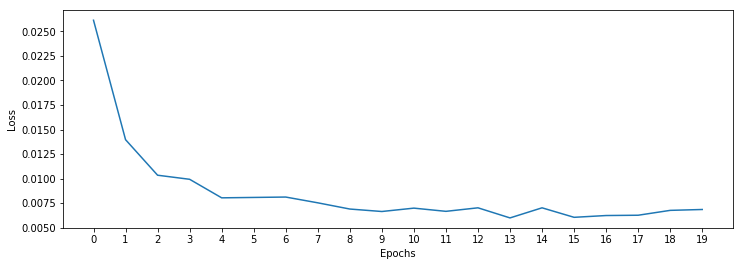

In [55]:
losses_lstm = lstm_model.history.history['loss']
plt.figure(figsize=(12,4))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(np.arange(0,21,1))
plt.plot(range(len(losses_lstm)),losses_lstm);

In [59]:
lstm_predictions_scaled = list()

batch = scaled_train_data[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))

for i in range(len(test_data)):   
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)

As you know we scaled our data that's why we have to inverse it to see true predictions.

In [60]:
lstm_predictions_scaled

[array([0.5164761], dtype=float32),
 array([0.6005075], dtype=float32),
 array([0.72476846], dtype=float32),
 array([0.72167337], dtype=float32),
 array([0.5429983], dtype=float32),
 array([0.51433825], dtype=float32),
 array([0.5691196], dtype=float32),
 array([0.4371619], dtype=float32),
 array([0.43787313], dtype=float32),
 array([0.42071435], dtype=float32),
 array([0.44136357], dtype=float32),
 array([0.49209848], dtype=float32)]

In [61]:
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)

In [62]:
lstm_predictions

array([[143.82084249],
       [156.67764716],
       [175.68957435],
       [175.21602552],
       [147.87874203],
       [143.493753  ],
       [151.87529461],
       [131.68576958],
       [131.79458814],
       [129.16929533],
       [132.32862668],
       [140.09106751]])

In [197]:
test_data['LSTM_Predictions'] = lstm_predictions

In [198]:
test_data

,Monthly beer production,ARIMA_Predictions,LSTM_Predictions
Month,,,
1994-09-01,143.0,134.008405,143.820842
1994-10-01,160.0,157.758778,156.677647
1994-11-01,190.0,181.853430,175.689574
1994-12-01,182.0,183.584877,175.216026
1995-01-01,138.0,144.878746,147.878742
1995-02-01,136.0,136.895118,143.493753
1995-03-01,152.0,151.207671,151.875295
1995-04-01,127.0,133.210529,131.685770
1995-05-01,151.0,137.955201,131.794588


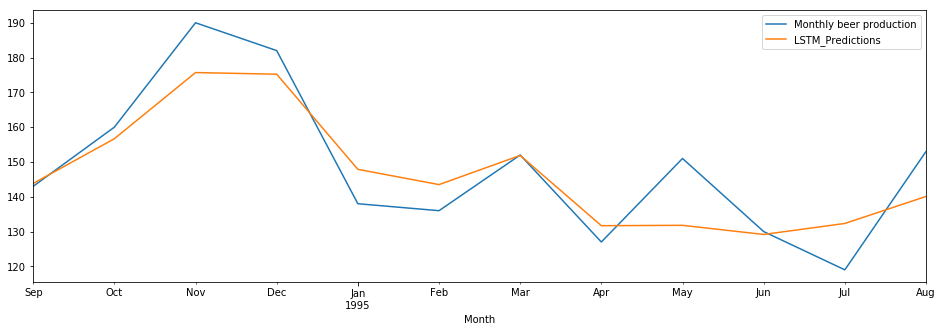

In [68]:
test_data['Monthly beer production'].plot(figsize = (16,5), legend=True)
test_data['LSTM_Predictions'].plot(legend = True);

In [121]:
lstm_rmse_error = rmse(test_data['Monthly beer production'], test_data["LSTM_Predictions"])
lstm_mse_error = lstm_rmse_error**2
mean_value = df['Monthly beer production'].mean()

print(f'MSE Error: {lstm_mse_error}\nRMSE Error: {lstm_rmse_error}\nMean: {mean_value}')

MSE Error: 96.00591760115354
RMSE Error: 9.79826094779852
Mean: 136.39537815126045


## Prophet Forecast

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 476 entries, 1956-01-01 to 1995-08-01
Freq: MS
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Monthly beer production  476 non-null    float64
dtypes: float64(1)
memory usage: 7.4 KB


In [20]:
df_pr = df.copy()
df_pr = df.reset_index()

In [21]:
df_pr.columns = ['ds','y'] # To use prophet column names should be like that

In [22]:
train_data_pr = df_pr.iloc[:len(df)-12]
test_data_pr = df_pr.iloc[len(df)-12:]

In [23]:
from fbprophet import Prophet

In [24]:
m = Prophet()
m.fit(train_data_pr)
future = m.make_future_dataframe(periods=12,freq='MS')
prophet_pred = m.predict(future)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [25]:
prophet_pred.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
471,1995-04-01,151.146328,130.423552,154.941627,151.073697,151.201805,-7.956851,-7.956851,-7.956851,-7.956851,-7.956851,-7.956851,0.0,0.0,0.0,143.189478
472,1995-05-01,151.082843,126.536677,153.645868,150.988554,151.166347,-11.400291,-11.400291,-11.400291,-11.400291,-11.400291,-11.400291,0.0,0.0,0.0,139.682552
473,1995-06-01,151.017241,114.335120,140.604455,150.896477,151.129994,-23.915887,-23.915887,-23.915887,-23.915887,-23.915887,-23.915887,0.0,0.0,0.0,127.101354
474,1995-07-01,150.953756,122.060765,147.742681,150.816865,151.083112,-15.746555,-15.746555,-15.746555,-15.746555,-15.746555,-15.746555,0.0,0.0,0.0,135.207201
475,1995-08-01,150.888155,129.444136,153.691243,150.720229,151.062050,-9.208543,-9.208543,-9.208543,-9.208543,-9.208543,-9.208543,0.0,0.0,0.0,141.679612


In [26]:
prophet_pred = pd.DataFrame({"Date" : prophet_pred[-12:]['ds'], "Pred" : prophet_pred[-12:]["yhat"]})

In [27]:
prophet_pred = prophet_pred.set_index("Date")

In [28]:
prophet_pred.index.freq = "MS"

In [29]:
prophet_pred

,Pred
Date,
1994-09-01,145.087502
1994-10-01,166.104924
1994-11-01,173.729015
1994-12-01,185.977964
1995-01-01,155.260571
1995-02-01,146.818146
1995-03-01,158.923972
1995-04-01,143.189478
1995-05-01,139.682552


In [30]:
test_data["Prophet_Predictions"] = prophet_pred['Pred'].values

In [31]:
import seaborn as sns

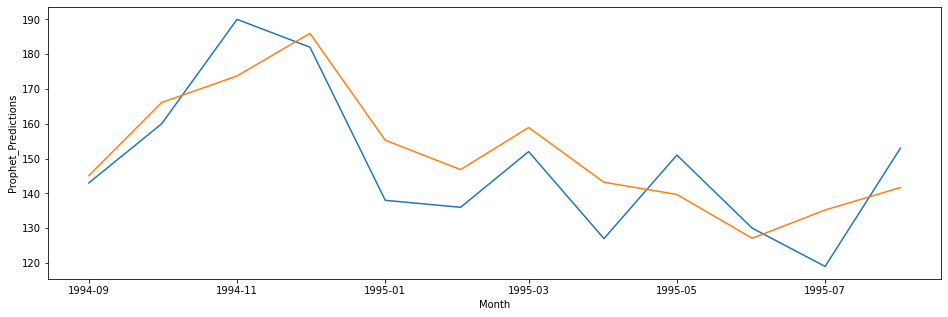

In [32]:
plt.figure(figsize=(16,5))
ax = sns.lineplot(x= test_data.index, y=test_data["Monthly beer production"])
sns.lineplot(x=test_data.index, y = test_data["Prophet_Predictions"]);

In [33]:
prophet_rmse_error = rmse(test_data['Monthly beer production'], test_data["Prophet_Predictions"])
prophet_mse_error = prophet_rmse_error**2
mean_value = df['Monthly beer production'].mean()

print(f'MSE Error: {prophet_mse_error}\nRMSE Error: {prophet_rmse_error}\nMean: {mean_value}')

MSE Error: 131.20903532674512
RMSE Error: 11.454651252951576
Mean: 136.39537815126045


In [34]:
rmse_errors = [arima_rmse_error, lstm_rmse_error, prophet_rmse_error]
mse_errors = [arima_mse_error, lstm_mse_error, prophet_mse_error]
errors = pd.DataFrame({"Models" : ["ARIMA", "LSTM", "Prophet"],"RMSE Errors" : rmse_errors, "MSE Errors" : mse_errors})

NameError: name 'lstm_rmse_error' is not defined

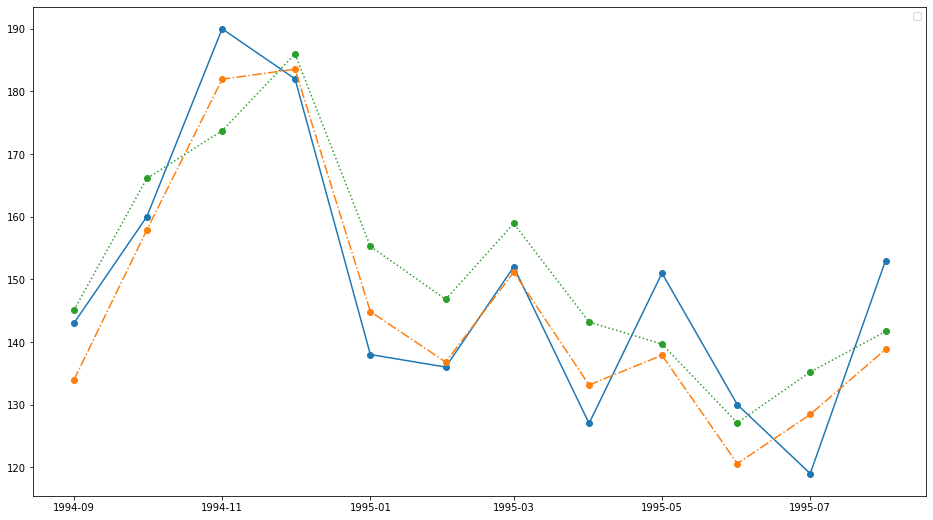

In [36]:
plt.figure(figsize=(16,9))
plt.plot_date(test_data.index, test_data["Monthly beer production"], linestyle="-")
plt.plot_date(test_data.index, test_data["ARIMA_Predictions"], linestyle="-.")
#plt.plot_date(test_data.index, test_data["LSTM_Predictions"], linestyle="--")
plt.plot_date(test_data.index, test_data["Prophet_Predictions"], linestyle=":")
plt.legend()
plt.show()

In [38]:
print(f"Mean: {test_data['Monthly beer production'].mean()}")
#errors

Mean: 148.41666666666666


In [39]:
test_data

,Monthly beer production,ARIMA_Predictions,Prophet_Predictions
Month,,,
1994-09-01,143.0,133.940921,145.087502
1994-10-01,160.0,157.881452,166.104924
1994-11-01,190.0,181.949510,173.729015
1994-12-01,182.0,183.549671,185.977964
1995-01-01,138.0,144.855921,155.260571
1995-02-01,136.0,136.797400,146.818146
1995-03-01,152.0,151.158303,158.923972
1995-04-01,127.0,133.143691,143.189478
1995-05-01,151.0,137.883746,139.682552


Don't forget they are just quick and basic predictions so you can improve these models with tuning and according to your data and business knowledge.

<br>

Thanks!